In [1]:
df = read.csv('USA_Housing.csv')
head(df)

Avg..Area.Income,Avg..Area.House.Age,Avg..Area.Number.of.Rooms,Avg..Area.Number.of.Bedrooms,Area.Population,Price,Address
79545.46,5.682861,7.009188,4.09,23086.80,1059033.6,"208 Michael Ferry Apt. 674 Laurabury, NE 37010-5101"
79248.64,6.002900,6.730821,3.09,40173.07,1505890.9,"188 Johnson Views Suite 079 Lake Kathleen, CA 48958"
61287.07,5.865890,8.512727,5.13,36882.16,1058988.0,"9127 Elizabeth Stravenue Danieltown, WI 06482-3489"
63345.24,7.188236,5.586729,3.26,34310.24,1260616.8,USS Barnett FPO AP 44820
59982.20,5.040555,7.839388,4.23,26354.11,630943.5,USNS Raymond FPO AE 09386
80175.75,4.988408,6.104512,4.04,26748.43,1068138.1,"06039 Jennifer Islands Apt. 443 Tracyport, KS 16077"


In [2]:
df = df[,1:6]

In [4]:
head(df)

Avg..Area.Income,Avg..Area.House.Age,Avg..Area.Number.of.Rooms,Avg..Area.Number.of.Bedrooms,Area.Population,Price
79545.46,5.682861,7.009188,4.09,23086.80,1059033.6
79248.64,6.002900,6.730821,3.09,40173.07,1505890.9
61287.07,5.865890,8.512727,5.13,36882.16,1058988.0
63345.24,7.188236,5.586729,3.26,34310.24,1260616.8
59982.20,5.040555,7.839388,4.23,26354.11,630943.5
80175.75,4.988408,6.104512,4.04,26748.43,1068138.1


In [18]:
summary(df)

 Avg..Area.Income Avg..Area.House.Age Avg..Area.Number.of.Rooms
 Min.   : 17797   Min.   :2.644       Min.   : 3.236           
 1st Qu.: 61481   1st Qu.:5.322       1st Qu.: 6.299           
 Median : 68804   Median :5.970       Median : 7.003           
 Mean   : 68583   Mean   :5.977       Mean   : 6.988           
 3rd Qu.: 75783   3rd Qu.:6.651       3rd Qu.: 7.666           
 Max.   :107702   Max.   :9.519       Max.   :10.760           
 Avg..Area.Number.of.Bedrooms Area.Population       Price        
 Min.   :2.000                Min.   :  172.6   Min.   :  15939  
 1st Qu.:3.140                1st Qu.:29403.9   1st Qu.: 997577  
 Median :4.050                Median :36199.4   Median :1232669  
 Mean   :3.981                Mean   :36163.5   Mean   :1232073  
 3rd Qu.:4.490                3rd Qu.:42861.3   3rd Qu.:1471210  
 Max.   :6.500                Max.   :69621.7   Max.   :2469066  

In [11]:
library(caTools)
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”

In [12]:
library('GGally')

Warning message:
“package ‘GGally’ was built under R version 3.4.4”

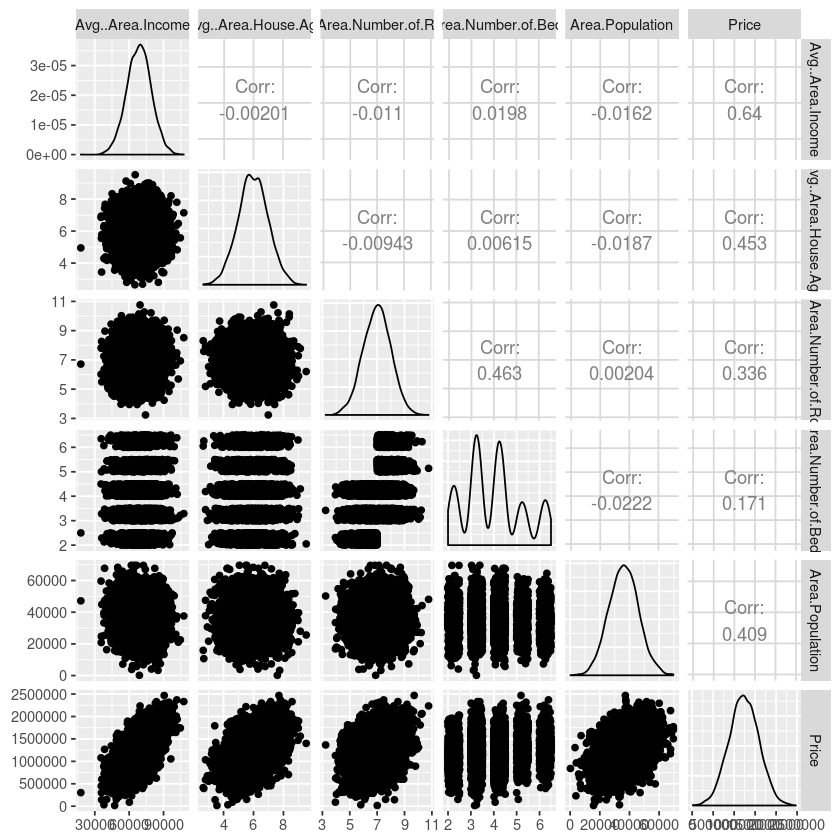

In [15]:
ggpairs(df)

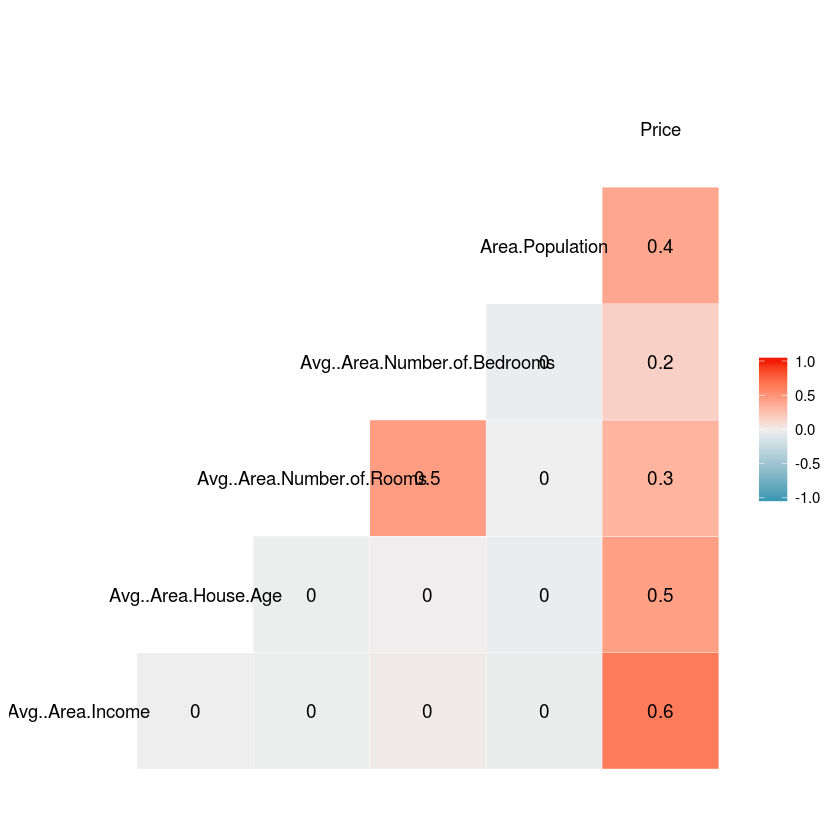

In [17]:
ggcorr(df,label= TRUE)

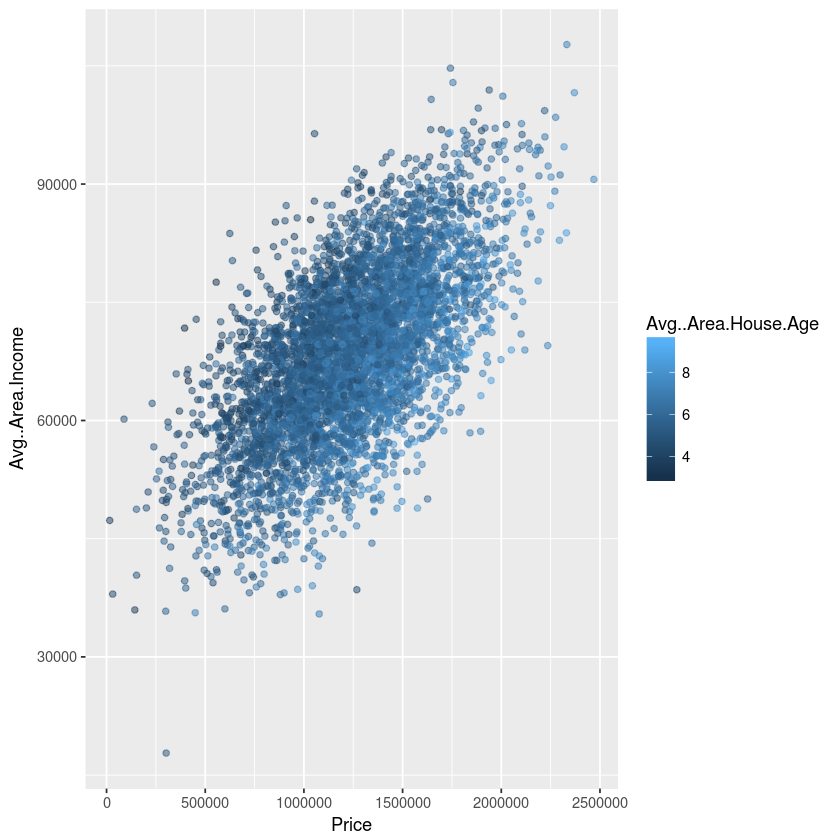

In [25]:
pl = ggplot(df,aes(x= Price, y = Avg..Area.Income)) + geom_point(aes(color = Avg..Area.House.Age),alpha = 0.5)
pl

In [26]:
set.seed(101)

In [27]:
sample = sample.split(df$Price,SplitRatio = 0.7 )

In [28]:
train = subset(df, sample == TRUE)
test =  subset(df, sample == FALSE)

In [29]:
model = lm(Price ~ . , data = train)

In [30]:
summary(model)


Call:
lm(formula = Price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-336105  -69033    1422   67454  348773 

Coefficients:
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                  -2.640e+06  2.026e+04 -130.333   <2e-16 ***
Avg..Area.Income              2.155e+01  1.613e-01  133.599   <2e-16 ***
Avg..Area.House.Age           1.664e+05  1.714e+03   97.128   <2e-16 ***
Avg..Area.Number.of.Rooms     1.206e+05  1.919e+03   62.868   <2e-16 ***
Avg..Area.Number.of.Bedrooms  2.250e+03  1.559e+03    1.444    0.149    
Area.Population               1.511e+01  1.721e-01   87.793   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100600 on 3494 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.9189 
F-statistic:  7931 on 5 and 3494 DF,  p-value: < 2.2e-16


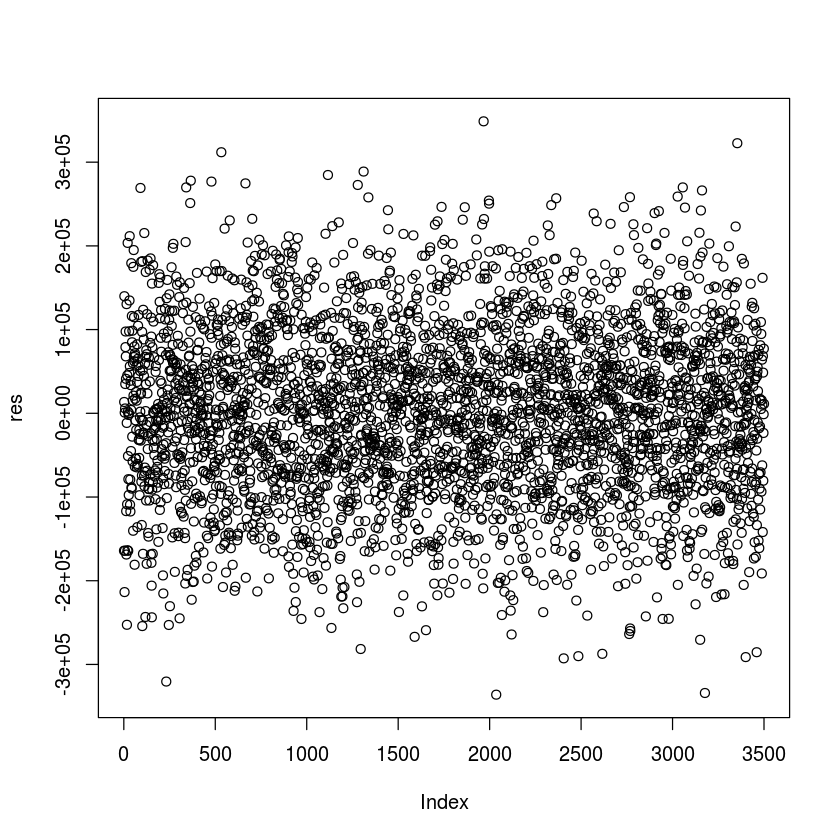

In [32]:
res <- residuals(model)
plot(res)

In [33]:
pred = predict(model, test)

In [34]:
result <- cbind(pred,test$Price)
result <- as.data.frame(result)
colnames(result) <- c('Predicted','Actual')


,Predicted,Actual
3,1252289.05,1058988.0
11,1773069.19,1707045.7
12,628069.37,663732.4
13,951724.02,1042814.1
14,1304428.13,1291331.5
17,1519414.80,1556786.6
22,1073969.55,929247.6
25,900255.84,895737.1
26,1473482.07,1453974.5
36,1272942.37,1199193.8


In [35]:
head(result)

,Predicted,Actual
3,1252289.0,1058988.0
11,1773069.2,1707045.7
12,628069.4,663732.4
13,951724.0,1042814.1
14,1304428.1,1291331.5
17,1519414.8,1556786.6


In [43]:
SSE <- sum( (result$Actual- result$Predicted) ^ 2 )
SST <- sum( (mean(df$Price)- result$Actual)^2 )
r2 <- 1 - SSE/SST

In [44]:
r2

[1] 0.9155567